In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
import glob
#First, investigate cassette files.
data_list = sorted(glob.glob('/content/drive/MyDrive/sleep_edfx/data/sleep-cassette/**'))
trains_SC = [x for x in data_list if x.endswith('PSG.edf')]
labels_SC= [x for x in data_list if x.endswith('Hypnogram.edf')]

print('number of train samples:',len(trains))
print('number of labels:',len(labels))

number of train samples: 153
number of labels: 153


In [3]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 5.4 MB/s 


In [42]:
import mne
ann = mne.read_annotations(labels_SC[4])

In [43]:
ann.duration

array([2.187e+04, 7.800e+02, 3.000e+01, 4.500e+02, 9.300e+02, 3.000e+01,
       4.500e+02, 6.000e+01, 6.000e+01, 3.000e+01, 3.000e+01, 3.000e+01,
       3.000e+01, 9.000e+01, 3.000e+01, 6.000e+01, 3.000e+01, 3.000e+01,
       9.000e+01, 6.000e+01, 9.000e+01, 1.200e+02, 3.000e+01, 1.500e+02,
       3.000e+01, 2.700e+02, 3.000e+01, 1.200e+02, 3.000e+01, 6.000e+02,
       3.000e+01, 9.000e+01, 3.000e+01, 5.100e+02, 3.000e+01, 1.800e+02,
       3.000e+01, 6.000e+01, 6.000e+01, 3.000e+01, 1.200e+02, 3.000e+01,
       6.000e+01, 3.000e+01, 6.000e+01, 3.000e+01, 1.200e+02, 3.000e+01,
       3.000e+01, 3.000e+01, 3.000e+01, 3.000e+01, 3.000e+01, 6.000e+01,
       3.000e+01, 3.000e+01, 3.000e+01, 2.400e+02, 3.000e+01, 9.000e+01,
       3.000e+01, 8.700e+02, 3.000e+01, 3.300e+02, 3.000e+01, 3.000e+01,
       1.200e+02, 3.000e+01, 6.000e+01, 3.000e+01, 9.000e+01, 1.200e+02,
       6.000e+01, 5.700e+02, 3.000e+01, 6.000e+01, 2.100e+02, 3.000e+01,
       3.000e+01, 9.000e+01, 6.000e+01, 3.300e+02, 

In [44]:
ann.description

array(['Sleep stage W', 'Sleep stage 1', 'Sleep stage W', 'Sleep stage 1',
       'Sleep stage 2', 'Sleep stage W', 'Sleep stage 2', 'Sleep stage 3',
       'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage 3',
       'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 2', 'Sleep stage 3',
       'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage 3',
       'Sleep stage 4', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage 2',
       'Sleep stage 3', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 2',
       'Sleep stage 1', 'Sleep stage 2', 'Sleep stage R', 'Sleep stage 2',
       'Sleep stage R', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 2',
       'Sleep stage 3', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4',
       'Sleep stage 3', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4',
       'Sleep stage 3', 'Sleep stage 2', 'Sleep stage 4', 'Sleep stage 3',
       'Sleep stage 4', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage 3',
       'Sleep stage 4', '

In [45]:
annotaion = []
for dur, des in zip(ann.duration, ann.description):
  for i in range(int(dur)//30):
    annotaion.append(des[-1])


In [46]:
import numpy as np
annotaion = np.array(annotaion)

In [47]:
unique, counts = np.unique(annotaion, return_counts = True)
uniq_cnt_dict = dict(zip(unique, counts))
uniq_cnt_dict

{'1': 94, '2': 545, '3': 73, '4': 22, '?': 76, 'R': 163, 'W': 1907}

In [48]:
uniq_cnt_dict.keys()

dict_keys(['1', '2', '3', '4', '?', 'R', 'W'])

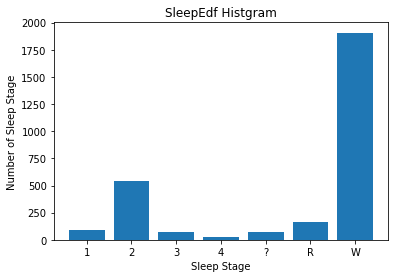

In [49]:
import matplotlib.pyplot as plt
x = np.arange(7)

plt.bar(x,uniq_cnt_dict.values())
plt.xticks(x, uniq_cnt_dict.keys())
plt.xlabel('Sleep Stage')
plt.ylabel('Number of Sleep Stage')
plt.title('SleepEdf Histgram')
plt.savefig('SleepEDF_Histogram',bbox_inches = 'tight')

Data Imbalance Problem

we truncate the leading and the tail wake sleep epochs and preserve only 30 minutes for them respectively to alleviate the class-imbalance problem.[1]


[1] Self-Supervised Learning for Sleep Stage Classification with Predictive and Discriminative Contrastive Coding

In [66]:
annotaion = []
for dur, des in zip(ann.duration, ann.description):
  for i in range(int(dur)//30):
    if des =='Sleep stage W' and i == 60:
      break

    annotaion.append(des[-1])


In [67]:
annotaion = np.array(annotaion)
unique, counts = np.unique(annotaion, return_counts = True)
uniq_cnt_dict = dict(zip(unique, counts))
uniq_cnt_dict

{'1': 94, '2': 545, '3': 73, '4': 22, '?': 76, 'R': 163, 'W': 128}

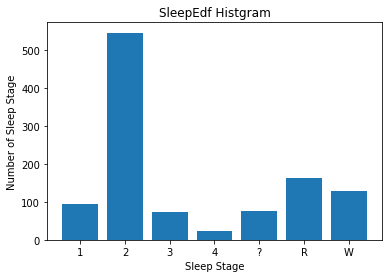

In [52]:
import matplotlib.pyplot as plt
x = np.arange(7)

plt.bar(x,uniq_cnt_dict.values())
plt.xticks(x, uniq_cnt_dict.keys())
plt.xlabel('Sleep Stage')
plt.ylabel('Number of Sleep Stage')
plt.title('SleepEdf Histgram')
plt.savefig('Cutted_SleepEDF_Histogram',bbox_inches = 'tight')

verification in data

In [ ]:
data = mne.io.read_raw_edf(trains_SC[4])
data = data.get_data()[:2,:]
ann = mne.read_annotations(labels_SC[4])

labels = []
for dur, des in zip(ann.duration, ann.description):
    for i in range(int(dur) // 30):
        labels.append(des[-1])

asd = []
n= 0
for slice_index in range(data.shape[1] // (100 * 30)): # 200Hz, 30epochs
    # ingore the no labels
        if labels[slice_index] == '?':
            n = 0
            continue
        if labels[slice_index] == 'W':
           n += 1
        else:
           n = 0

        if n >= 61:
           continue
        asd.append(labels[slice_index])

Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-cassette/SC4021E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [65]:
asd = np.array(asd)
unique, counts = np.unique(asd, return_counts = True)
uniq_cnt_dict1 = dict(zip(unique, counts))
uniq_cnt_dict1

{'1': 94, '2': 545, '3': 73, '4': 22, 'R': 163, 'W': 128}

In [68]:
uniq_cnt_dict

{'1': 94, '2': 545, '3': 73, '4': 22, '?': 76, 'R': 163, 'W': 128}

Save the data

In [74]:
import os
for i in range(len(trains_SC)):
    print(i)
    if i == 5:  # 5개 sample만 진행
      break 
    subjetc_id = trains_SC[i].split('/')[-1].split('-')[0]
    
    # load signal and upsampling
    data = mne.io.read_raw_edf(trains_SC[i])
    data = data.get_data()[:2,:]
    data = mne.filter.resample(data, up = 2.0) # upsampling to 200Hz  
    
    # load annotaion
    ann = mne.read_annotations(labels_SC[i])
    labels = []
    for dur, des in zip(ann.duration, ann.description):
        for i in range(int(dur) // 30):
          labels.append(des[-1])

    n = 0
    for slice_index in range(data.shape[1] // (200 * 30)): # 200Hz, 30epochs
    # ingore the no labels
        if labels[slice_index] == '?':
            n = 0
            continue
        elif labels[slice_index] == 'W':
           n += 1
        else:
           n = 0

        if n >= 61:
           continue
        
        adress = '/content/drive/MyDrive/sleep_edfx/Cutted_EEG'
        if not os.path.exists(adress+'/_'+str(subjetc_id)):
            os.makedirs(adress+'/_'+str(subjetc_id))
        
        data_adress = adress+'/_'+str(subjetc_id)
            
        data_path = data_adress +'/'+ str(subjetc_id) + '_' + str(slice_index) + '.npz'
        X = data[:, slice_index * 200 * 30: (slice_index+1) * 200 * 30]
        Y = labels[slice_index]
        np.savez(data_path, x = X, y = Y)

0
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-cassette/SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
1
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-cassette/SC4002E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
2
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-cassette/SC4011E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
3
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-cassette/SC4012E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
4
Extracting EDF parameters from /content/drive/MyDrive/sleep_edfx/data/sleep-cassette/SC4021E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
5
